In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random as r

## Monte Carlo Methods

#### MLC

In [1]:
a = 40692.
m = 2147483399.
no = 6
n = [no] 
r = [no/m]

In [2]:
for i in range(1000):
    n_new = (a * n[-1]) % m
    r_new = n[-1] / m
    n.append(n_new)
    r.append(r_new)

(array([107., 108.,  93.,  89., 115., 103., 100., 102.,  96.,  88.]),
 array([2.79396805e-09, 9.99013035e-02, 1.99802604e-01, 2.99703905e-01,
        3.99605206e-01, 4.99506507e-01, 5.99407807e-01, 6.99309108e-01,
        7.99210409e-01, 8.99111710e-01, 9.99013010e-01]),
 <a list of 10 Patch objects>)

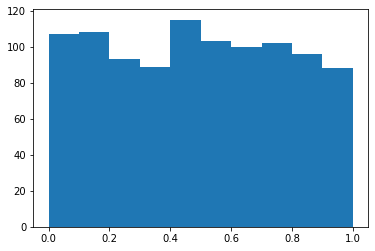

In [5]:
plt.hist(r)

#### Acceptance-Rejection Method

Given the pdf $f(t) = \frac{e^{-t}}{1-e^{-1}}$ over the range x $\epsilon$ [0,1], apply A.R.M. to plot a histogram for multiple experiments. Overlay the theoretical pdf overtop.

In [22]:
def f(t):
    return np.exp(-t)/(1-np.exp(-1))

In [23]:
count = 0
trials = []
while count <= 1000:
    r1 = r.random()
    r2 = r.random()
    t_trial = 0.0 + (1.-0.) * r1
    if f(t_trial) > 1.582 * r2:
        count += 1
        trials.append(t_trial)

In [24]:
t = np.linspace(0,1,1000)
f_theo = f(t)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


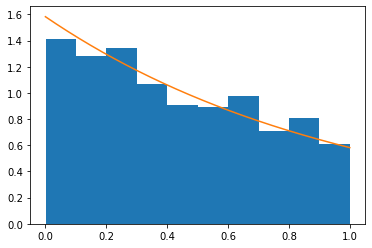

In [25]:
plt.hist(trials,normed = True)
plt.plot(t,f_theo)

## Likelihood and Estimators

Given the pdf $f(s|a,b) = \frac{2s}{b^2}(\frac{b}{\sqrt{s^2-a^2}}-1)$, write its respective negative log likelihood

In [34]:
def func(s,a,b):
    term1 = s*2/b**2
    term2 = (b/np.sqrt(s**2-a**2))-1
    return term1*term2

In [35]:
def negLogLike(b):
    sum = 0.
    for x in s:
        sum -= np.log(func(x,a,b))
    return sum

In [36]:
np.random.seed(1234)
count = 0
s = []
while count < 100:
    #Selecting a value along each rod
    y1 = r.uniform(5,10)
    y2 = r.uniform(5,10)
    #Finding distance between points
    si = np.sqrt(a ** 2 + (y2-y1) ** 2)
    s.append(si)
    count += 1

In [37]:
b_val = np.linspace(5,10,1000)

L = []
for i in b_val:
    L.append(negLogLike(i))

(array([121.,  99.,  95.,  93.,  93.,  95.,  96., 100., 102., 106.]),
 array([-905.23025542, -901.02385751, -896.8174596 , -892.61106169,
        -888.40466378, -884.19826587, -879.99186796, -875.78547005,
        -871.57907214, -867.37267423, -863.16627632]),
 <a list of 10 Patch objects>)

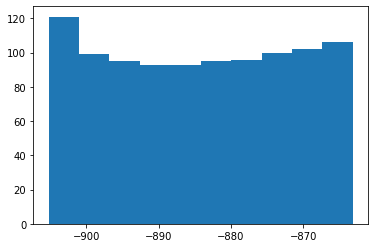

In [38]:
plt.hist(L)